<font color="Teal" face="Comic Sans MS,arial"><font color = 'darkblue'>
  <h1 align="center"><i>Análisis de acciones tecnológicas.</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
    <h5 align="center"><i>Integrante: **Avalos Gonzalez Joel Sebastian**</i></h5>
    <h5 align="center"><i>Integrante: **Barriga Rosales Alan**</i></h5>
    <h5 align="center"><i>Integrante: **Hernández Lozano Juan Pablo**</i></h5>
    <h5 align="center"><i>Materia: Mineria de datos</i></h5>
  </font>

# Esquema de la semana 2 (08/11/2021--12/11/2021)

- [Desarrollo e integacion de la informacion](#2)
    - [Generacion de ABT datos conjuntos](#07)
    - [Descripcion de la base de datos para el modelo](#08)
    - [Documentacion](#09)

- [Modelacion](#3)
    - [Analisis tecnico](#10)
    - [Analisis predictivo](#11)
        - [Series de tiempo y modelos de ML](#12)
    - [Descripcion de las tecnicas y metricas de evaluacion del modelo](#13)


  

<a name='2'> </a> 

## Desarrollo e integacion de la informacion

<a name='07'> </a> 
### Generacion de ABT datos conjuntos

Para darnos una idea rápida exploratoria general, vemos algunas medidas para cada variable númerica en el conjunto. Recordemos en que consisten las variables en el dataset para tener una mejor vision de ellos:  
**VARIABLES**

|Atributo   |Descripcion| 
|------------------------|------------|
|**Date**|Fecha que se toma en cuenta por cada dia transcurrido|
|**Open**|La apertura es el período de inicio de la negociación en una bolsa de valores o en un mercado extrabursátil organizado. |
|**High**|El máximo es el precio más alto al que se negoció una acción durante el transcurso del día de negociación y, por lo general, es más alto que el cierre o igual al precio de cierre.|
|**Low**|El mínimo es típicamente más bajo que el precio de apertura o cierre, ya que es inusual que el precio más bajo del día|
|**Close**|El cierre es el precio de cierre que generalmente se refiere al último precio al que se negocia una acción durante una sesión de negociación regular.|
|**Adj Close**|El cierre ajustado es el precio de cierre ajustado que modifica el precio de cierre de una acción para reflejar el valor de esa acción después|
|**Volume**|El volumen puede ser un indicador de la fortaleza del mercado, ya que los mercados en alza con un volumen en aumento suelen ser|

<a name='08'> </a> 
### Descripcion de la base de datos para el modelo

Desde que Yahoo! Finance desmanteló su API de datos históricos, muchos programas que dependían de ella para dejar de funcionar.

Usaremos la liberaria `yfinance`.

- `yfinanc` tiene como objetivo resolver este problema ofreciendo una forma confiable, con subprocesos y Pythonic de descargar datos históricos del mercado de Yahoo! Finanzas.

Variables en las cuales realizaremos los analisis:     

- Adj Close:      
- Volume:    


<a name='09'> </a> 
### Documentacion

<a name='3'> </a> 
## Modelacion

<a name='10'> </a> 
### Analisis tecnico

In [ ]:
pip install yfinance

In [ ]:
#Using yfinance to access Yahoo Historical Stocks
import yfinance as yf
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline



In [ ]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','FB','NFLX', 'TSLA']

for stock in stock_list:
    globals()[stock] = yf.download(stock,period="15d", interval="1h")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


###### Cambio en el precio de las acciones a lo largo del tiempo

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

#fig = px.line(x=NFLX.index, y=NFLX['Adj Close'], title='Time Series with Range Slider and Selectors')
fig.add_trace(go.Scatter(x=FB.index, y=FB['Adj Close'], name = 'FB', line_color = 'blue'))

fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['Adj Close'], name = 'NFLX', line_color = 'red'))
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], name = 'AAPL', line_color = 'gray'))
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], name = 'GOOG', line_color = 'green'))
fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Adj Close'], name = 'TSLA', line_color = 'black'))
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], name = 'AMZN', line_color = 'orange'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], name = 'MSFT', line_color = 'pink'))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
       buttons=list([
             dict(count=1, label="1d", step="day", stepmode="backward"),
             dict(count=12, label="12h", step="hour", stepmode="backward"),
             dict(count=4, label="4h", step="hour", stepmode="backward"),
             dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de cierre de las empresas')
fig.show()

##### Serie de tiempo del volumen de las empresas

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

#fig = px.line(x=NFLX.index, y=NFLX['Adj Close'], title='Time Series with Range Slider and Selectors')
fig.add_trace(go.Scatter(x=FB.index, y=FB['Volume'], name = 'FB', line_color = 'blue'))
fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['Volume'], name = 'NFLX', line_color = 'red'))
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Volume'], name = 'AAPL', line_color = 'gray'))
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Volume'], name = 'GOOG', line_color = 'green'))
fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Volume'], name = 'TSLA', line_color = 'black'))
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Volume'], name = 'AMZN', line_color = 'orange'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], name = 'MSFT', line_color = 'pink'))

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
             dict(count=1, label="1d", step="day", stepmode="backward"),
             dict(count=12, label="12h", step="hour", stepmode="backward"),
             dict(count=4, label="4h", step="hour", stepmode="backward"),
             dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo del volumen de las empresas')
fig.show()

######  Calcular promedios móviles

In [ ]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    AAPL[label] = AAPL['Adj Close'].rolling(window = avg, center = False).mean()

averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    GOOG[label] = GOOG['Adj Close'].rolling(window = avg, center = False).mean()


averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    TSLA[label] = TSLA['Adj Close'].rolling(window = avg, center = False).mean()


averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    AMZN[label] = AMZN['Adj Close'].rolling(window = avg, center = False).mean()

averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    FB[label] = FB['Adj Close'].rolling(window = avg, center = False).mean()

averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s horas" %(str(avg))
    MSFT[label] = MSFT['Adj Close'].rolling(window = avg, center = False).mean()

In [ ]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 horas,MAvg for 25 horas,MAvg for 50 horas
2021-12-03 10:30:00-05:00,607.405029,607.500000,601.739990,602.729980,602.729980,483146,615.221777,634.346909,646.798640
2021-12-03 11:30:00-05:00,602.744995,603.659973,595.460022,601.073486,601.073486,709780,613.553125,631.817449,645.534122
2021-12-03 12:30:00-05:00,601.020020,602.119995,599.010010,601.219971,601.219971,352589,611.591119,629.319048,644.376322
2021-12-03 13:30:00-05:00,601.270020,601.719971,599.000000,601.000000,601.000000,85830,609.777850,626.475847,643.394122
2021-12-03 13:50:18-05:00,601.150024,601.150024,601.150024,601.150024,601.150024,0,608.005353,624.194648,642.376423


##### Series de tiempo con medias moviles

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['Adj Close'], name = 'NFLX', line_color = 'blue'))
fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=NFLX.index, y=NFLX['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
       buttons=list([
             dict(count=1, label="1d", step="day", stepmode="backward"),
             dict(count=12, label="12h", step="hour", stepmode="backward"),
             dict(count=4, label="4h", step="hour", stepmode="backward"),
             dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Netflix')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['Adj Close'], name = 'APPL', line_color = 'blue'))
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=AAPL.index, y=AAPL['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
       buttons=list([
             dict(count=1, label="1d", step="day", stepmode="backward"),
             dict(count=12, label="12h", step="hour", stepmode="backward"),
             dict(count=4, label="4h", step="hour", stepmode="backward"),
             dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Apple')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['Adj Close'], name = 'GOOG', line_color = 'blue'))
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=GOOG.index, y=GOOG['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Google')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['Adj Close'], name = 'TSLA', line_color = 'blue'))
fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=TSLA.index, y=TSLA['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Tesla')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['Adj Close'], name = 'AMZN', line_color = 'blue'))
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=AMZN.index, y=AMZN['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Amazon')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=FB.index, y=FB['Adj Close'], name = 'FB', line_color = 'blue'))
fig.add_trace(go.Scatter(x=FB.index, y=FB['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=FB.index, y=FB['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=FB.index, y=FB['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Facebook')
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['Adj Close'], name = 'MSFT', line_color = 'blue'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MAvg for 10 horas'], name = 'MAvg for 10 horas', line_color = 'red'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MAvg for 25 horas'], name = 'MAvg for 25 horas', line_color = 'orange'))
fig.add_trace(go.Scatter(x=MSFT.index, y=MSFT['MAvg for 50 horas'], name = 'MAvg for 50 horas', line_color = 'green'))
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(title='Serie de tiempo de la empresa Microsoft')
fig.show()

##### Correlación entre diferentes rendimientos diarios de acciones.

Ahora examinemos la tendencia entre algunos pares de acciones, utilizando el cambio porcentual de los rendimientos diarios.


In [ ]:
close_compr = yf.download(stock_list,period="15d", interval="1h")['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%***********************]  7 of 7 completed


,AAPL,AMZN,FB,GOOG,MSFT,NFLX,TSLA
2021-12-03 13:50:20-05:00,0.000000,0.0,0.000000,-0.000392,0.000000,0.000000,0.000000
2021-12-03 13:50:21-05:00,0.000000,0.0,0.000000,0.000000,0.000000,0.000266,0.000000
2021-12-03 13:50:22-05:00,0.000000,0.0,-0.000099,0.000000,0.000000,0.000000,0.000000
2021-12-03 13:50:23-05:00,0.000000,0.0,0.000000,0.000000,-0.000251,0.000000,-0.000882
2021-12-03 13:50:25-05:00,-0.000501,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
import plotly.express as px
fig = px.scatter(rets_compr, x="NFLX", y="AAPL", marginal_x="histogram", marginal_y="histogram")
fig.show()

Parece haber una correlación moderada entre los retornos de Netflix y Apple. 

Generaré todos los gráficos por pares para ver si hay correlaciones más fuertes.

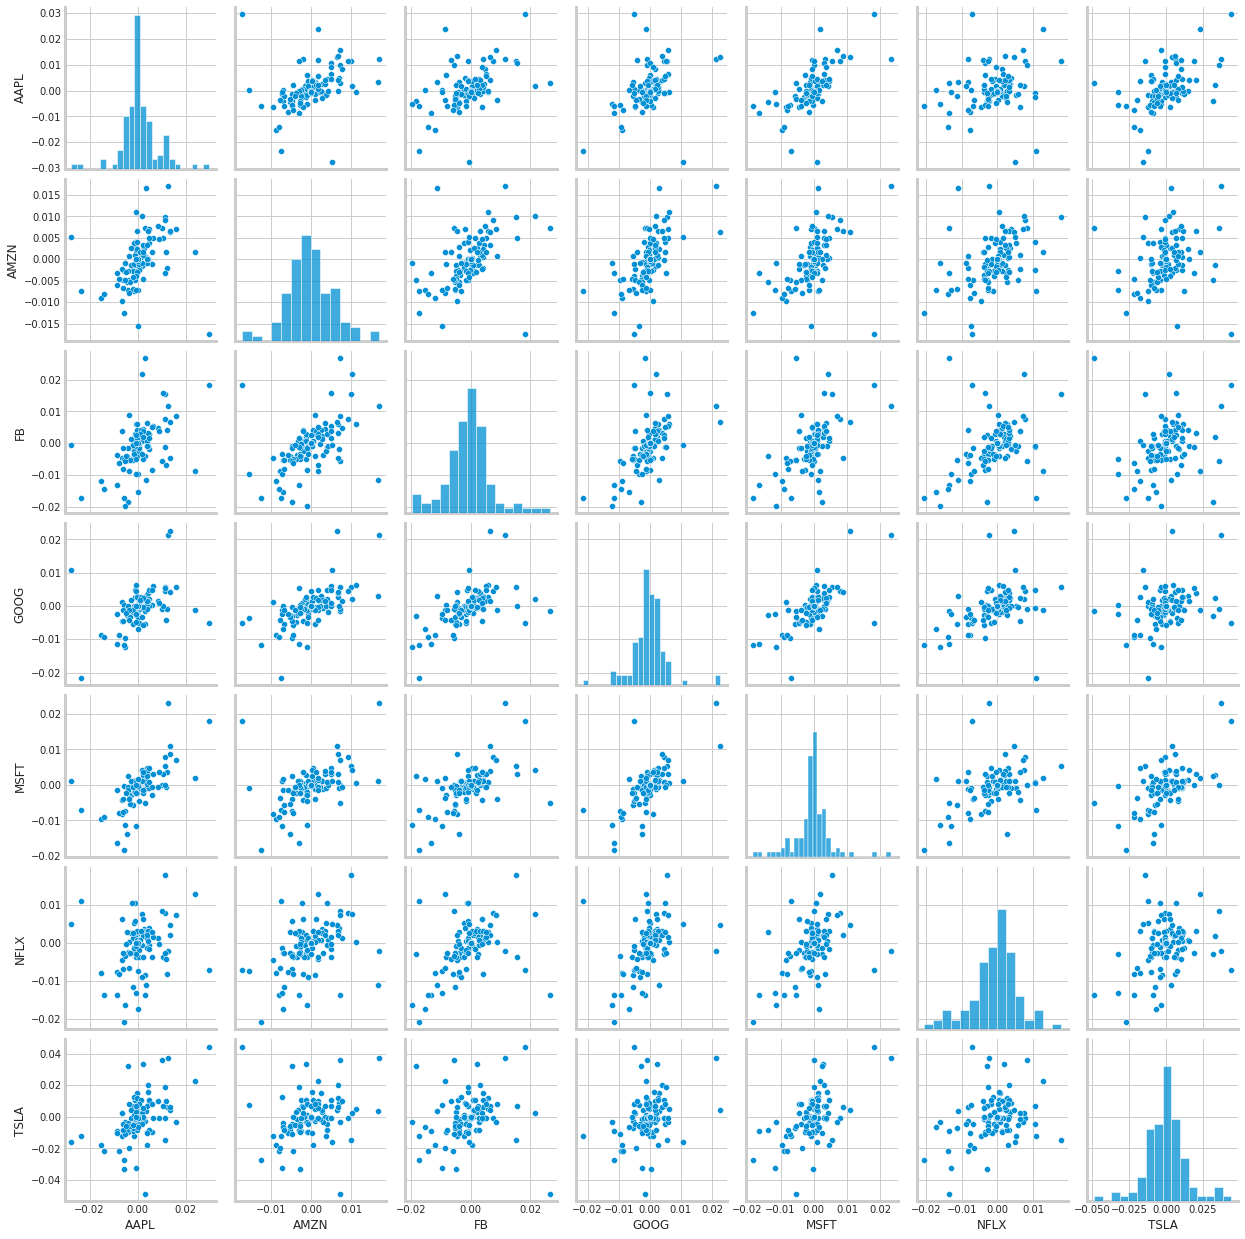

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(rets_compr.dropna())

In [ ]:
data = {'NFLX':NFLX['Open'],'AAPL':AAPL['Open'], 'AMZN':AMZN['Open'], 'GOOG':GOOG['Open'], 'FB':FB['Open'], 'MSFT':MSFT['Open'], 'TSLA':TSLA['Open'] }
actCorr = pd.DataFrame(data)
actCorr.head()

,NFLX,AAPL,AMZN,GOOG,FB,MSFT,TSLA
2021-11-12 09:30:00-05:00,660.010010,148.429993,3485.000000,2956.629883,330.179993,333.920013,1047.500000
2021-11-12 10:30:00-05:00,661.130005,148.259995,3489.169922,2960.820068,335.529999,334.779999,1046.839966
2021-11-12 11:30:00-05:00,672.455017,149.949997,3520.159912,2979.899902,340.674988,336.600006,1031.619995
2021-11-12 12:30:00-05:00,679.500000,149.789993,3534.500000,2992.379883,340.179993,336.820007,1027.284180
2021-11-12 13:30:00-05:00,677.080017,149.699997,3521.848389,2983.800049,339.000000,336.579987,1025.579956


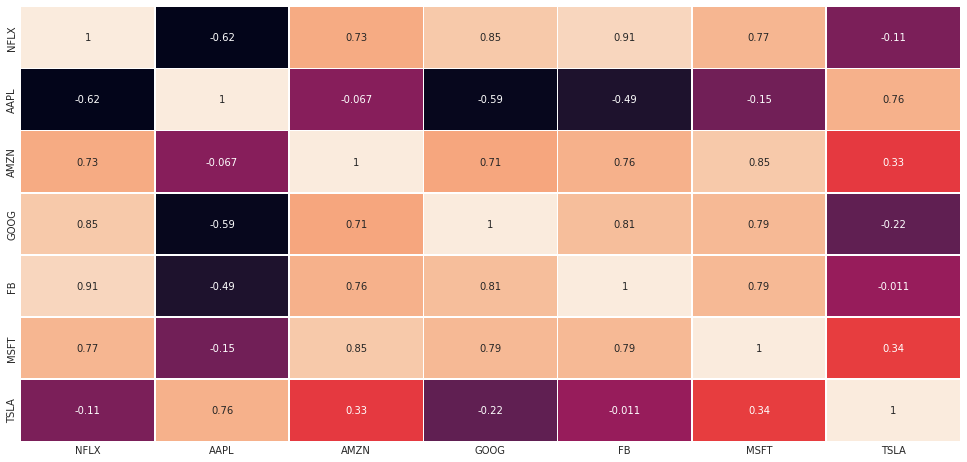

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(actCorr.corr(), annot=True, linewidths=.5, cbar=False)
plt.show()

<a name='11'> </a> 
### Analisis predictivo

<a name='12'> </a> 
### Series de tiempo y modelos de ML



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import StratifiedKFold
from scipy.stats import describe as Describe
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','FB','NFLX', 'TSLA']
SP500 = yf.download('^GSPC',period="15d", interval="1h")
for stock in stock_list:
    globals()[stock] = yf.download(stock,period="15d", interval="1h")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Google

In [ ]:
def MA(n, x):
  ma = np.zeros(len(x))
  for i in range(n - 1, len(x)):
    ma[i] = sum(x[i-n + 1:i + 1])/n
  for j in range(n - 1):
    ma[j] = np.mean(ma[n - 1:len(x)])
  return ma

def momentum(x):
  momentum = np.zeros(len(x))
  for i in range(4, len(x)):
    momentum[i] = x[i] - x[i - 4]
  for j in range(4):
    momentum[j] = np.mean(momentum[4:len(x)])

  return momentum

def disparity(n, x):
  disparity = np.zeros(len(x))
  ma = MA(n, x)
  for i in range(len(x)):
    disparity[i] = x[i]/ma[i]
  return disparity

def OBV(v):
  obv = np.zeros(len(v))
  obv[0] = v[0]
  for i in range(1,len(v)):
    if v[i - 1] <= v[i]:
      obv[i] = obv[i - 1] + v[i]
    else:
      obv[i] = obv[i - 1] - v[i]
  return obv

def upsdowns(x):
  ups = np.zeros(len(x))
  for i in range(len(x) - 1):
    if x[i + 1] >= x[i]:
      ups[i] = 1
    else:
      ups[i] = 0
  return ups

def PSY(n, x):
  ups = upsdowns(x)
  psy = np.zeros(len(ups))
  for i in range(n, len(ups)):
    psy[i] = sum(ups[i - n:i])/n
  for i in range(0, n):
    psy[i] = np.mean(psy[n:len(ups)])
  return psy*100

def BIAS(n, x):
  ma = MA(n, x)
  bias = np.zeros(len(x))
  for i in range(len(x)):
    bias[i] = (x[i] - ma[i])/ma[i]
  return bias*100

In [ ]:
datos = pd.DataFrame()
close_prices = GOOG['Adj Close'].values
volume = GOOG.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = GOOG.High.values
datos['LOW'] = GOOG.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
datos.head()

,UPSDOWNS,CLOSE,HIGH,LOW,VOLUME,S&P500,MA-5,OBV,PSY-12,BIAS-6,DISPARITY-5,MOMENTUM
0,1.0,2960.479980,2964.199951,2929.125000,185998,4655.500000,2939.950016,185998.0,44.382022,0.688247,1.006983,-5.899228
1,1.0,2977.054932,2979.979980,2946.399902,132724,4678.390137,2939.950016,53274.0,44.382022,1.251974,1.012621,-5.899228
2,0.0,2991.760010,2993.729980,2971.080078,125904,4681.950195,2939.950016,-72630.0,44.382022,1.752105,1.017623,-5.899228
3,1.0,2983.860107,2997.000000,2982.350098,70066,4676.700195,2939.950016,-142696.0,44.382022,1.483423,1.014936,-5.899228
4,1.0,2986.669922,2993.610107,2983.800049,60422,4675.459961,2979.964990,-203118.0,44.382022,1.578987,1.002250,26.189941


In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

### Regresión logística para saber si va de subida o bajada

Para este caso 0.0 representa que va de bajada y 1.0 que va de subida.

Un primer método que nos gustaría probar es la regresión logística. Por simplicidad utilizaremos pipelines para poder probar varias alternativas. En dichos pipelines lo que haremos será estandarizar los datos (recordemos que es recomendable si nuestro objetivo es clasificar), posteriormente aplicaremos algún metodo de reducción de datos y finalmente aplicaremos el método de regresión logística para clasificar. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5714


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print("Pliegue %2d : Dist por clase : %s, Acc %.3f" %
        (k+1, np.bincount(np.array(y_train[train], dtype = 'int64')),score))
print('Promedio : ',np.mean(scores))

Pliegue  1 : Dist por clase : [41 31], Acc 0.375
Pliegue  2 : Dist por clase : [41 31], Acc 0.500
Pliegue  3 : Dist por clase : [41 31], Acc 0.625
Pliegue  4 : Dist por clase : [41 31], Acc 0.500
Pliegue  5 : Dist por clase : [41 31], Acc 0.500
Pliegue  6 : Dist por clase : [40 32], Acc 0.375
Pliegue  7 : Dist por clase : [40 32], Acc 0.625
Pliegue  8 : Dist por clase : [40 32], Acc 0.500
Pliegue  9 : Dist por clase : [40 32], Acc 0.625
Pliegue 10 : Dist por clase : [40 32], Acc 0.375
Promedio :  0.5


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.42857142857142855
0.0
0.0
0.0


###### Busqueda exaustuva utilizando GridSearch

In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [ ]:
print('Mejor exactitud',clf.best_score_)
print('Mejores parámetros',clf.best_params_)

Mejor exactitud 0.6125
Mejores parámetros {'logisticregression__C': 100, 'pca__n_components': 9}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.571


### KernelPCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5238


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print("Pliegue %2d : Dist por clase : %s, Acc %.3f" %
        (k+1, np.bincount(np.array(y_train[train], dtype = 'int64')),score))
print('Promedio : ',np.mean(scores))

Pliegue  1 : Dist por clase : [42 30], Acc 0.625
Pliegue  2 : Dist por clase : [42 30], Acc 0.625
Pliegue  3 : Dist por clase : [42 30], Acc 0.625
Pliegue  4 : Dist por clase : [42 30], Acc 0.625
Pliegue  5 : Dist por clase : [42 30], Acc 0.625
Pliegue  6 : Dist por clase : [42 30], Acc 0.625
Pliegue  7 : Dist por clase : [42 30], Acc 0.625
Pliegue  8 : Dist por clase : [43 29], Acc 0.500
Pliegue  9 : Dist por clase : [43 29], Acc 0.500
Pliegue 10 : Dist por clase : [43 29], Acc 0.500
Promedio :  0.5875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.47619047619047616
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'kernelpca__n_components' : [i for i in range(1,12)],
              'kernelpca__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)
clf = clf.fit(X_train,y_train)
print('Mejor accuracy : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Mejor accuracy :  0.7
Mejores parámetros :  {'kernelpca__kernel': 'sigmoid', 'kernelpca__n_components': 11, 'logisticregression__C': 100}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.524


### TreeDescision primero (PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print("Pliegue %2d : Dist por clase : %s, Acc %.3f" %
        (k+1, np.bincount(np.array(y_train[train], dtype = 'int64')),score))
print('Promedio : ', np.mean(scores))

Pliegue  1 : Dist por clase : [45 27], Acc 0.500
Pliegue  2 : Dist por clase : [44 28], Acc 0.625
Pliegue  3 : Dist por clase : [44 28], Acc 0.375
Pliegue  4 : Dist por clase : [44 28], Acc 0.625
Pliegue  5 : Dist por clase : [44 28], Acc 0.375
Pliegue  6 : Dist por clase : [44 28], Acc 0.375
Pliegue  7 : Dist por clase : [44 28], Acc 0.500
Pliegue  8 : Dist por clase : [44 28], Acc 0.625
Pliegue  9 : Dist por clase : [44 28], Acc 0.750
Pliegue 10 : Dist por clase : [44 28], Acc 0.625
Promedio :  0.5375


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6190476190476191
0.4444444444444444
0.3333333333333333
0.380952380952381


In [ ]:
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud obtenida : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

Mejor exactitud obtenida :  0.6
Mejores parámetros :  {'decisiontreeclassifier__criterion': 'entropy', 'pca__n_components': 11}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.333


##### KErnelPCA de sklearn

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print("Pliegue %2d : Dist por clase : %s, Acc %.3f" %
        (k+1, np.bincount(np.array(y_train[train], dtype = 'int64')),score))
print('Promedio : ',np.mean(scores))

Pliegue  1 : Dist por clase : [40 32], Acc 0.375
Pliegue  2 : Dist por clase : [40 32], Acc 0.750
Pliegue  3 : Dist por clase : [40 32], Acc 0.250
Pliegue  4 : Dist por clase : [40 32], Acc 0.375
Pliegue  5 : Dist por clase : [40 32], Acc 0.250
Pliegue  6 : Dist por clase : [40 32], Acc 0.750
Pliegue  7 : Dist por clase : [39 33], Acc 0.500
Pliegue  8 : Dist por clase : [39 33], Acc 0.250
Pliegue  9 : Dist por clase : [39 33], Acc 0.625
Pliegue 10 : Dist por clase : [39 33], Acc 0.625
Promedio :  0.475


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.25
0.2857142857142857
0.26666666666666666


In [ ]:
param_range = np.linspace(0.03, 0.05, 10)
param_grid = {'kernelpca__gamma' : param_range,
              'kernelpca__kernel' : ["rbf", "sigmoid", "linear", "poly"],
              'kernelpca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.65
{'decisiontreeclassifier__criterion': 'gini', 'kernelpca__gamma': 0.03222222222222222, 'kernelpca__kernel': 'rbf', 'kernelpca__n_components': 10}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.476


##### SIN PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5714


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)
  print("Pliegue %2d : Dist por clase : %s, Acc %.3f" %
        (k+1, np.bincount(np.array(y_train[train], dtype = 'int64')),score))
print('Promedio : ',np.mean(scores))

Pliegue  1 : Dist por clase : [40 32], Acc 0.500
Pliegue  2 : Dist por clase : [40 32], Acc 0.500
Pliegue  3 : Dist por clase : [40 32], Acc 0.625
Pliegue  4 : Dist por clase : [40 32], Acc 0.625
Pliegue  5 : Dist por clase : [40 32], Acc 0.625
Pliegue  6 : Dist por clase : [41 31], Acc 0.875
Pliegue  7 : Dist por clase : [41 31], Acc 0.500
Pliegue  8 : Dist por clase : [41 31], Acc 0.250
Pliegue  9 : Dist por clase : [41 31], Acc 0.750
Pliegue 10 : Dist por clase : [41 31], Acc 0.875
Promedio :  0.6125


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))


0.42857142857142855
0.42857142857142855
0.375
0.39999999999999997


In [ ]:
param_grid = {'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud : ',clf.best_score_)
print('Mejores paŕametros : ',clf.best_params_)

Mejor exactitud :  0.525
Mejores paŕametros :  {'decisiontreeclassifier__criterion': 'gini'}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.619


### Analisis de series de tiempo

Si uno realiza una búsqueda en internet acerca de análisis financieros del precio de las acciones, lo más probable es que se encontrará con un análisis de la series de tiempo. La razón de esto es que las herramientas del análisis de series de tiempo parecen dar buenos resultados en este tipo de series. Existe una infinidad de modelos propuestos para explicar los movimientos en el precio de las acciones. Existen modelos cuyo objetivo es explicar el cambio de la volatilidad de la serie a través del tiempo (recordemos que la volatilidad es un factor particularmente importante y de gran interés en las series financieras. Como nuestro objetivo principal es probar los modelos vistos en clase para medir su efectividad en este tipo tan complejo de series de tiempo, aplicaremos un par de moledos que vimos en clase.


#### Holt-winters

In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



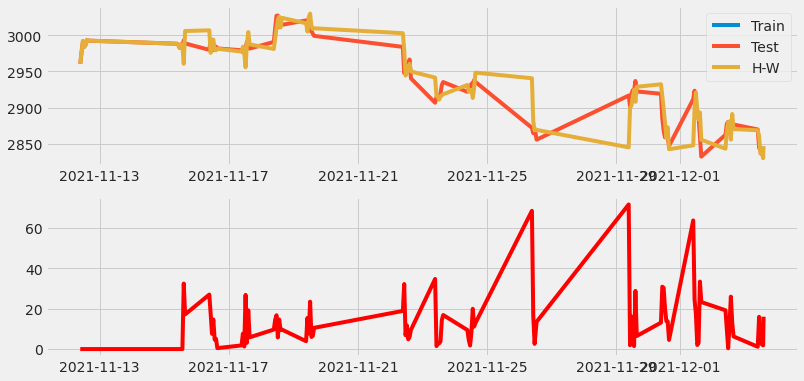

In [ ]:
pronostico_hw = plotHWSmothing(GOOG.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

0.5346534653465347

#### Regresion lineal

In [ ]:
datos_para_rl = pd.DataFrame(GOOG.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

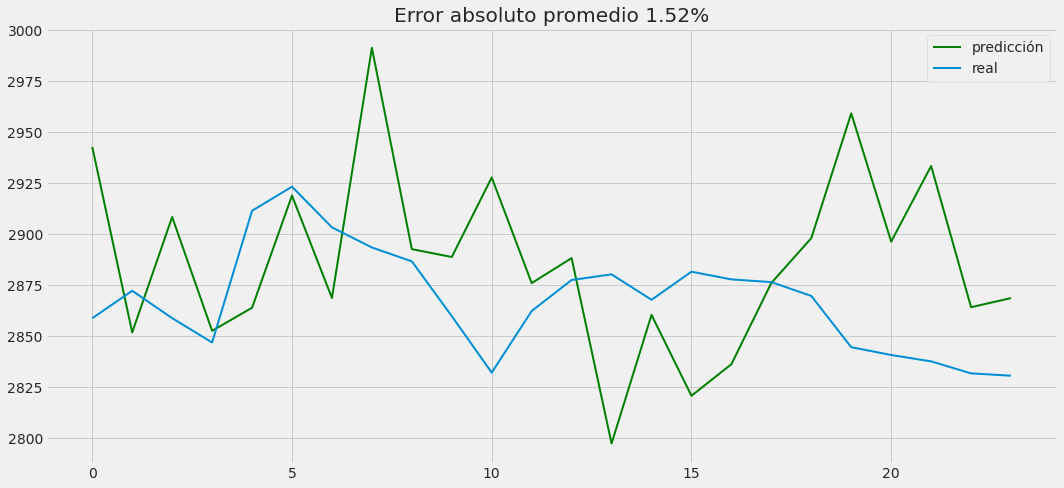

In [ ]:
plotModelResults(lr , plot_intervals = True )

##### Redes neuronales

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = GOOG.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

71

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.66041009, 0.74472234, 0.81952304, 0.7793384 , 0.79363116,
       0.82818389, 0.82313442, 0.801414  , 0.79220673, 0.77176544,
       0.79851422, 0.78869718, 0.82529653, 0.80360095, 0.75838049,
       0.82761139, 0.79052895, 0.75627055, 0.78315345, 0.78086343,
       0.76850303, 0.75558255, 0.74118795, 0.74133946, 0.77216532,
       0.81463999, 0.78569681, 0.7673841 , 0.81387623, 0.90945602,
       0.99760939, 1.        , 0.9173407 , 0.96378315, 0.93433081,
       0.96520634, 0.96556276, 0.94948915, 0.89381459, 0.89195798,
       0.87171291, 0.85660548, 0.77928749, 0.59423173, 0.61213711,
       0.65420444, 0.66376688, 0.69042128, 0.55796397, 0.38679488,
       0.42672618, 0.41807899, 0.42278322, 0.45205798, 0.51172518,
       0.53202117, 0.46337644, 0.48685163, 0.48008589, 0.51960613])]
[0.5214403781265791]

[array([0.66041009, 0.74472234, 0.81952304, 0.7793384 , 0.79363116,
       0.82818389, 0.82313442, 0.801414  , 0.79220673, 0.77176544,
       0.79851422, 0.78869718, 0.825

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(11, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

11/11 [==============================] - 3s 34ms/step - loss: 0.0427


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

21.710929361979165

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

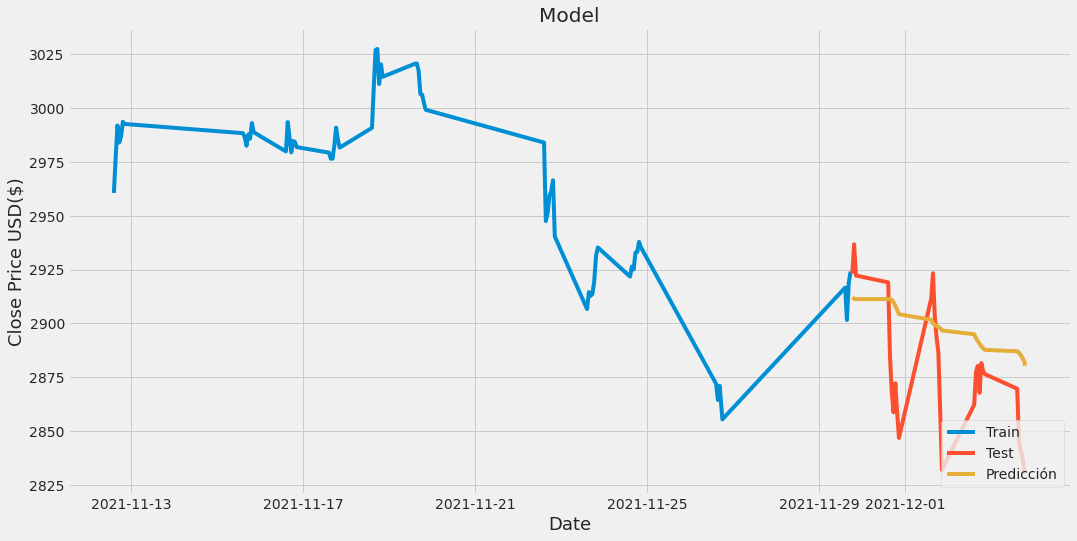

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
valid

,Close,Predictions
2021-11-29 13:30:00-05:00,2923.189941,2912.092529
2021-11-29 14:30:00-05:00,2936.689941,2911.404053
2021-11-29 15:30:00-05:00,2922.229004,2911.281738
2021-11-30 09:30:00-05:00,2919.060059,2911.302979
2021-11-30 10:30:00-05:00,2885.060059,2911.398926
2021-11-30 11:30:00-05:00,2868.210449,2910.951416
2021-11-30 12:30:00-05:00,2858.820068,2909.870361
2021-11-30 13:30:00-05:00,2872.270020,2908.210205
2021-11-30 14:30:00-05:00,2858.860107,2906.402100
2021-11-30 15:30:00-05:00,2846.929932,2904.271484


## APPLE

In [ ]:
def MA(n, x):
  ma = np.zeros(len(x))
  for i in range(n - 1, len(x)):
    ma[i] = sum(x[i-n + 1:i + 1])/n
  for j in range(n - 1):
    ma[j] = np.mean(ma[n - 1:len(x)])
  return ma

def momentum(x):
  momentum = np.zeros(len(x))
  for i in range(4, len(x)):
    momentum[i] = x[i] - x[i - 4]
  for j in range(4):
    momentum[j] = np.mean(momentum[4:len(x)])

  return momentum

def disparity(n, x):
  disparity = np.zeros(len(x))
  ma = MA(n, x)
  for i in range(len(x)):
    disparity[i] = x[i]/ma[i]
  return disparity

def OBV(v):
  obv = np.zeros(len(v))
  obv[0] = v[0]
  for i in range(1,len(v)):
    if v[i - 1] <= v[i]:
      obv[i] = obv[i - 1] + v[i]
    else:
      obv[i] = obv[i - 1] - v[i]
  return obv

def upsdowns(x):
  ups = np.zeros(len(x))
  for i in range(len(x) - 1):
    if x[i + 1] >= x[i]:
      ups[i] = 1
    else:
      ups[i] = 0
  return ups

def PSY(n, x):
  ups = upsdowns(x)
  psy = np.zeros(len(ups))
  for i in range(n, len(ups)):
    psy[i] = sum(ups[i - n:i])/n
  for i in range(0, n):
    psy[i] = np.mean(psy[n:len(ups)])
  return psy*100

def BIAS(n, x):
  ma = MA(n, x)
  bias = np.zeros(len(x))
  for i in range(len(x)):
    bias[i] = (x[i] - ma[i])/ma[i]
  return bias*100

In [ ]:
datos = pd.DataFrame()
close_prices = AAPL['Adj Close'].values
volume = AAPL.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = AAPL.High.values
datos['LOW'] = AAPL.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

##### Regresión logística

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4286


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.35


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5714285714285714
0.3333333333333333
0.3333333333333333
0.3333333333333333


In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [ ]:
print('Mejor exactitud',clf.best_score_)
print('Mejores parámetros',clf.best_params_)

Mejor exactitud 0.55
Mejores parámetros {'logisticregression__C': 1, 'pca__n_components': 4}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.524


### Kernel PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5125


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.38461538461538464
0.625
0.4761904761904762


In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'kernelpca__n_components' : [i for i in range(1,12)],
              'kernelpca__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)
clf = clf.fit(X_train,y_train)
print('Mejor accuracy : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Mejor accuracy :  0.6625
Mejores parámetros :  {'kernelpca__kernel': 'sigmoid', 'kernelpca__n_components': 6, 'logisticregression__C': 100}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.476


### Tree D. (PCA)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ', np.mean(scores))

Promedio :  0.525


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.4444444444444444
0.4
0.4210526315789474


In [ ]:
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud obtenida : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

Mejor exactitud obtenida :  0.6
Mejores parámetros :  {'decisiontreeclassifier__criterion': 'gini', 'pca__n_components': 11}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


#### kERNEL DE PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5125


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6190476190476191
0.3333333333333333
0.4444444444444444
0.380952380952381


In [ ]:
param_range = np.linspace(0.03, 0.05, 10)
param_grid = {'kernelpca__gamma' : param_range,
              'kernelpca__kernel' : ["rbf", "sigmoid", "linear", "poly"],
              'kernelpca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6875
{'decisiontreeclassifier__criterion': 'entropy', 'kernelpca__gamma': 0.03222222222222222, 'kernelpca__kernel': 'sigmoid', 'kernelpca__n_components': 5}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.190


##### Sin PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5238


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.4875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))


0.47619047619047616
0.45454545454545453
0.5555555555555556
0.5


In [ ]:
param_grid = {'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud : ',clf.best_score_)
print('Mejores paŕametros : ',clf.best_params_)

Mejor exactitud :  0.4625
Mejores paŕametros :  {'decisiontreeclassifier__criterion': 'gini'}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.524


In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



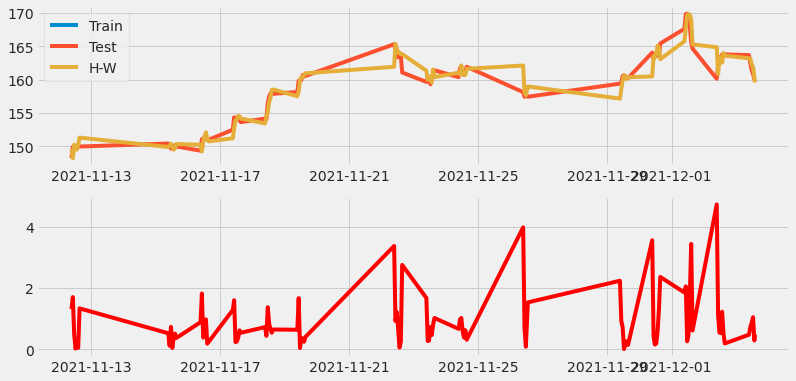

In [ ]:
pronostico_hw = plotHWSmothing(AAPL.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

0.5544554455445545

In [ ]:
datos_para_rl = pd.DataFrame(AAPL.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

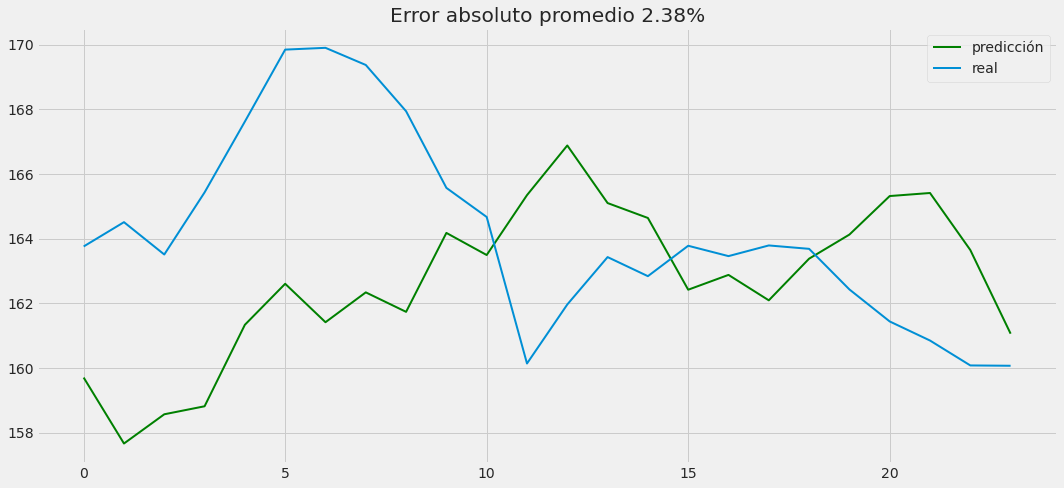

In [ ]:
plotModelResults(lr , plot_intervals = True )

### Redes neuronales

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = AAPL.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

71

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.        , 0.07829135, 0.07113628, 0.06651283, 0.06974572,
       0.08891472, 0.08036979, 0.10119646, 0.08360268, 0.06558462,
       0.08221706, 0.07505776, 0.09099738, 0.08083143, 0.05173189,
       0.13094723, 0.13302567, 0.13013883, 0.13353382, 0.12930717,
       0.12702082, 0.19676655, 0.28281275, 0.27043868, 0.2822172 ,
       0.27436509, 0.26096977, 0.24942242, 0.2734411 , 0.26928423,
       0.38102088, 0.42424943, 0.44742306, 0.4461199 , 0.44526569,
       0.45773702, 0.53578733, 0.53926126, 0.54064689, 0.57574634,
       0.56535838, 0.56859127, 0.78799087, 0.74757516, 0.69907616,
       0.69813385, 0.72771406, 0.70722428, 0.59260995, 0.52725157,
       0.55473431, 0.55289128, 0.51085453, 0.54480376, 0.57644338,
       0.60785253, 0.56050799, 0.62355676, 0.59446215, 0.60508128])]
[0.5746651875386757]

[array([0.        , 0.07829135, 0.07113628, 0.06651283, 0.06974572,
       0.08891472, 0.08036979, 0.10119646, 0.08360268, 0.06558462,
       0.08221706, 0.07505776, 0.090

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(11, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

11/11 [==============================] - 3s 29ms/step - loss: 0.0737


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.5377237955729166

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

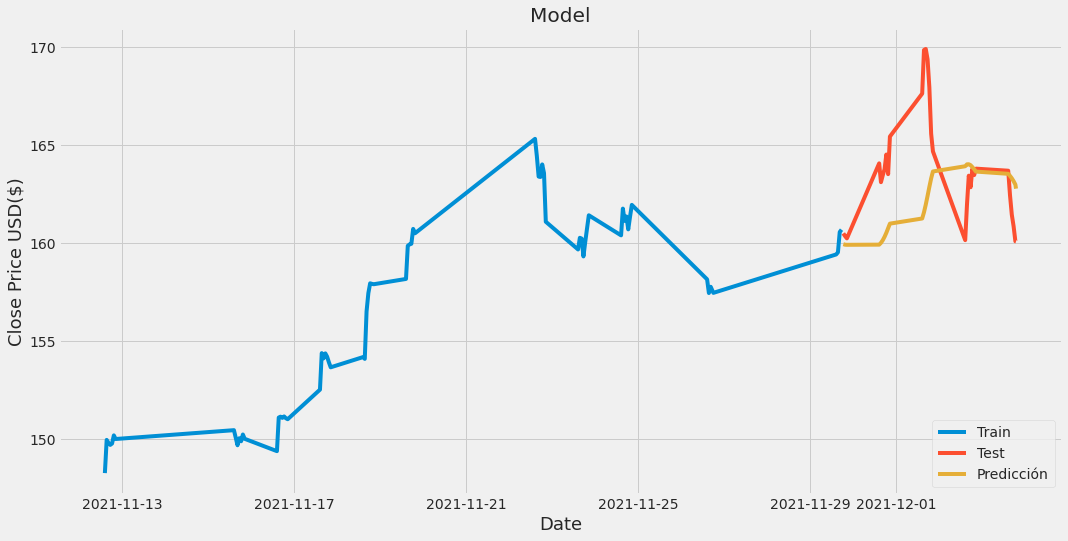

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
valid.head()

,Close,Predictions
2021-11-29 13:30:00-05:00,160.485001,159.935211
2021-11-29 14:30:00-05:00,160.345001,159.907822
2021-11-29 15:30:00-05:00,160.229996,159.902267
2021-11-30 09:30:00-05:00,164.059998,159.910736
2021-11-30 10:30:00-05:00,163.100006,160.003082


##### MSFT

In [ ]:
datos = pd.DataFrame()
close_prices = MSFT['Adj Close'].values
volume = MSFT.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = MSFT.High.values
datos['LOW'] = MSFT.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

### Regresión logística

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5125


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))


0.6190476190476191
0.375
0.2727272727272727
0.3157894736842105


In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [ ]:
print('Mejor exactitud',clf.best_score_)
print('Mejores parámetros',clf.best_params_)

Mejor exactitud 0.5875
Mejores parámetros {'logisticregression__C': 100, 'pca__n_components': 10}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.55


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.4444444444444444
0.4
0.4210526315789474


In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'kernelpca__n_components' : [i for i in range(1,12)],
              'kernelpca__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)
clf = clf.fit(X_train,y_train)
print('Mejor accuracy : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Mejor accuracy :  0.575
Mejores parámetros :  {'kernelpca__kernel': 'rbf', 'kernelpca__n_components': 2, 'logisticregression__C': 100}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5238


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ', np.mean(scores))

Promedio :  0.625


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.47619047619047616
0.5
0.4
0.4444444444444445


In [ ]:
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud obtenida : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

Mejor exactitud obtenida :  0.5375
Mejores parámetros :  {'decisiontreeclassifier__criterion': 'gini', 'pca__n_components': 4}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.6190


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.525


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.38095238095238093
0.5
0.875
0.6363636363636364


In [ ]:
param_range = np.linspace(0.03, 0.05, 10)
param_grid = {'kernelpca__gamma' : param_range,
              'kernelpca__kernel' : ["rbf", "sigmoid", "linear", "poly"],
              'kernelpca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.6625
{'decisiontreeclassifier__criterion': 'gini', 'kernelpca__gamma': 0.03666666666666667, 'kernelpca__kernel': 'rbf', 'kernelpca__n_components': 6}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.810


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.6190


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5375


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.38095238095238093
0.6363636363636364
0.6363636363636364
0.6363636363636364


In [ ]:
param_grid = {'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud : ',clf.best_score_)
print('Mejores paŕametros : ',clf.best_params_)

Mejor exactitud :  0.5875
Mejores paŕametros :  {'decisiontreeclassifier__criterion': 'entropy'}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



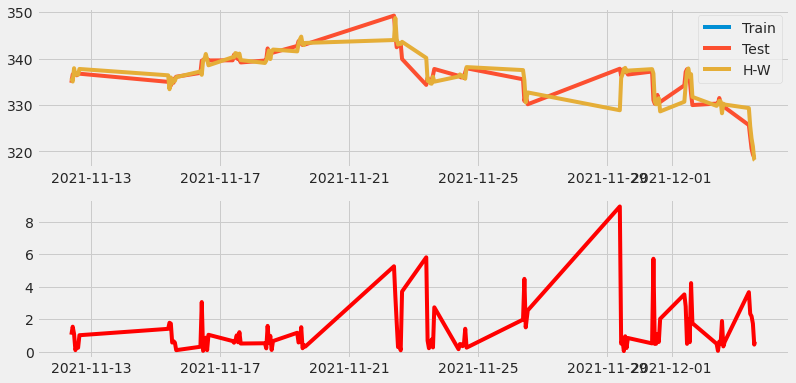

In [ ]:
pronostico_hw = plotHWSmothing(MSFT.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

0.5346534653465347

In [ ]:
datos_para_rl = pd.DataFrame(MSFT.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

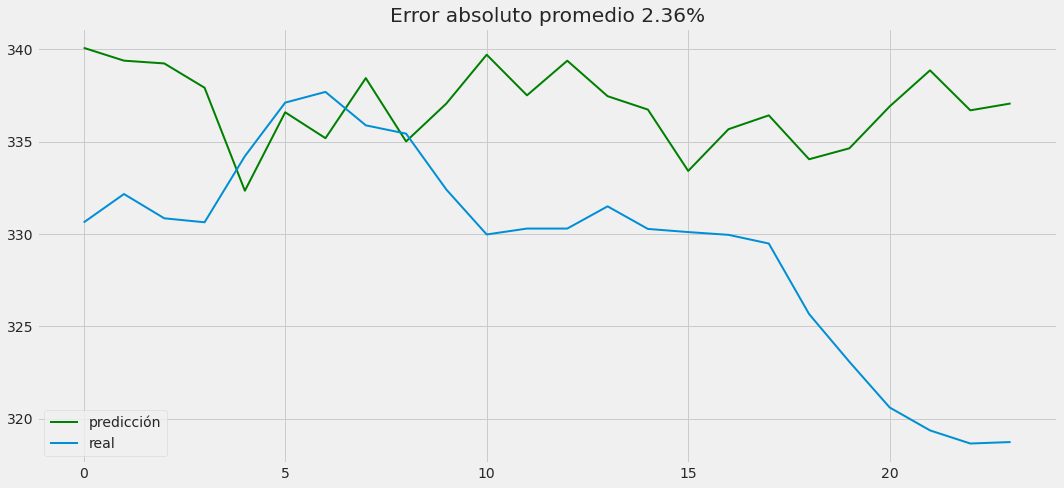

In [ ]:
plotModelResults(lr , plot_intervals = True )

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = MSFT.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

71

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.52699063, 0.58619492, 0.59371899, 0.58586848, 0.57998059,
       0.59110249, 0.59110249, 0.53369312, 0.54007216, 0.50768679,
       0.54007216, 0.52764151, 0.55841365, 0.56983902, 0.59666293,
       0.68302257, 0.68578283, 0.69692468, 0.70166754, 0.69479834,
       0.68433032, 0.68547535, 0.7245662 , 0.71409818, 0.70035978,
       0.69381702, 0.69316315, 0.67026449, 0.68367644, 0.69054564,
       0.76905476, 0.73797815, 0.72603867, 0.74026822, 0.73961334,
       0.78639497, 0.82041153, 0.81223358, 0.80274788, 0.79277002,
       0.80591444, 0.79718643, 1.        , 0.87078799, 0.77723271,
       0.78657167, 0.79073252, 0.80307432, 0.6944719 , 0.51226693,
       0.56365664, 0.53712722, 0.53516459, 0.54530517, 0.57932572,
       0.62446816, 0.57638178, 0.57049389, 0.564609  , 0.57736309])]
[0.5603533130082514]

[array([0.52699063, 0.58619492, 0.59371899, 0.58586848, 0.57998059,
       0.59110249, 0.59110249, 0.53369312, 0.54007216, 0.50768679,
       0.54007216, 0.52764151, 0.558

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(11, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

11/11 [==============================] - 3s 31ms/step - loss: 0.0997


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.640654500325521

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

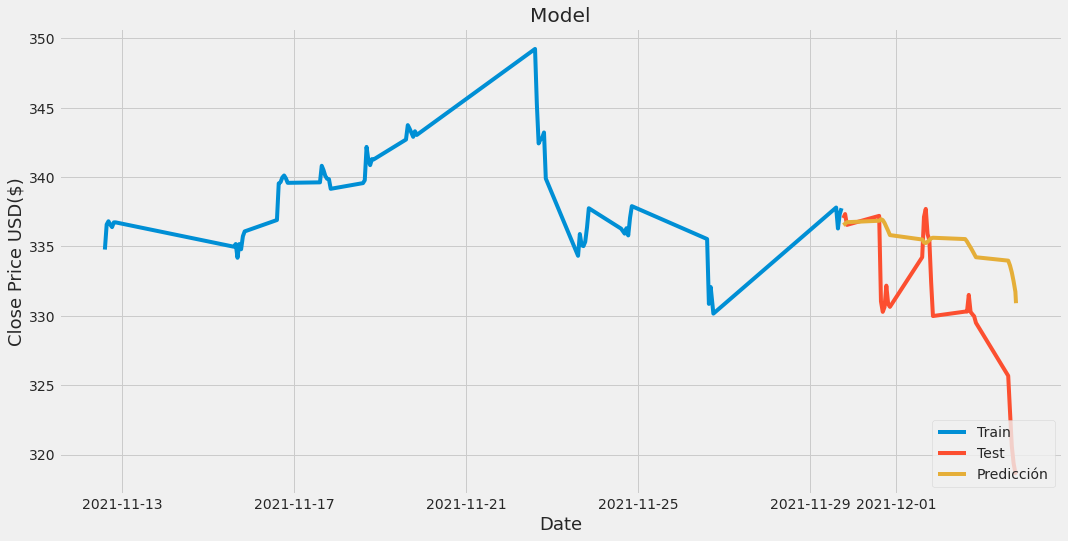

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
valid.head()

,Close,Predictions
2021-11-29 13:30:00-05:00,337.040009,336.535645
2021-11-29 14:30:00-05:00,337.329987,336.627380
2021-11-29 15:30:00-05:00,336.549988,336.742615
2021-11-30 09:30:00-05:00,337.200012,336.847443
2021-11-30 10:30:00-05:00,331.040009,336.958771


In [ ]:
datos = pd.DataFrame()
close_prices = AMZN['Adj Close'].values
volume = AMZN.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = AMZN.High.values
datos['LOW'] = AMZN.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5375


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6190476190476191
0.125
0.14285714285714285
0.13333333333333333


In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [ ]:
print('Mejor exactitud',clf.best_score_)
print('Mejores parámetros',clf.best_params_)

Mejor exactitud 0.5875
Mejores parámetros {'logisticregression__C': 0.01, 'pca__n_components': 1}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.476


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
param_range = [10**i for i in range(-4,5)]
param_grid = {'kernelpca__n_components' : [i for i in range(1,12)],
              'kernelpca__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
              'logisticregression__C' : param_range}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)
clf = clf.fit(X_train,y_train)
print('Mejor accuracy : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

Mejor accuracy :  0.6125
Mejores parámetros :  {'kernelpca__kernel': 'linear', 'kernelpca__n_components': 6, 'logisticregression__C': 1}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.619


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6190476190476191
0.2
0.2857142857142857
0.23529411764705882


In [ ]:
param_grid = {'pca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud obtenida : ',clf.best_score_)
print('Mejores parámetros : ',clf.best_params_)

Mejor exactitud obtenida :  0.5625
Mejores parámetros :  {'decisiontreeclassifier__criterion': 'entropy', 'pca__n_components': 7}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.381


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5714


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.42857142857142855
0.375
0.42857142857142855
0.39999999999999997


In [ ]:
param_range = np.linspace(0.03, 0.05, 10)
param_grid = {'kernelpca__gamma' : param_range,
              'kernelpca__kernel' : ["rbf", "sigmoid", "linear", "poly"],
              'kernelpca__n_components' : [i for i in range(1,12)],
              'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.625
{'decisiontreeclassifier__criterion': 'entropy', 'kernelpca__gamma': 0.03222222222222222, 'kernelpca__kernel': 'poly', 'kernelpca__n_components': 5}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.333


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4286


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5714285714285714
0.38461538461538464
0.5555555555555556
0.4545454545454546


In [ ]:
param_grid = {'decisiontreeclassifier__criterion' : ["gini", "entropy"]}
clf = GridSearchCV(estimator=pipe_lr, param_grid = param_grid,scoring='accuracy',cv=10)
clf = GridSearchCV(estimator=pipe_lr, param_grid=param_grid)

In [ ]:
clf = clf.fit(X_train,y_train)
print('Mejor exactitud : ',clf.best_score_)
print('Mejores paŕametros : ',clf.best_params_)

Mejor exactitud :  0.5
Mejores paŕametros :  {'decisiontreeclassifier__criterion': 'gini'}


In [ ]:
clf = clf.best_estimator_
clf.fit(X_train, y_train)
print('Exactitud de prueba : %.3f' % clf.score(X_test, y_test))

Exactitud de prueba : 0.429


In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



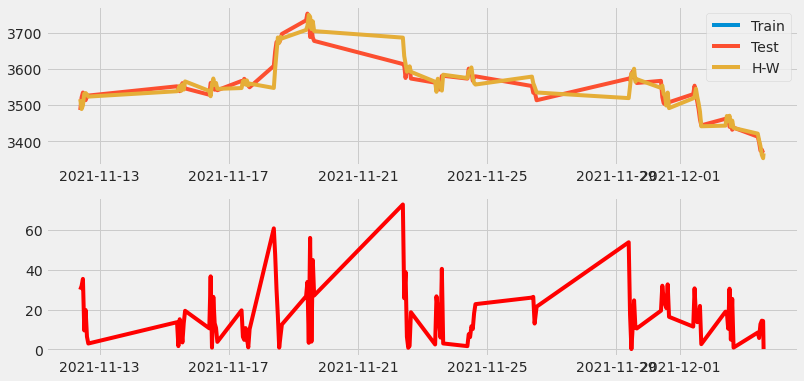

In [ ]:
pronostico_hw = plotHWSmothing(AMZN.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

0.48514851485148514

In [ ]:
datos_para_rl = pd.DataFrame(AMZN.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

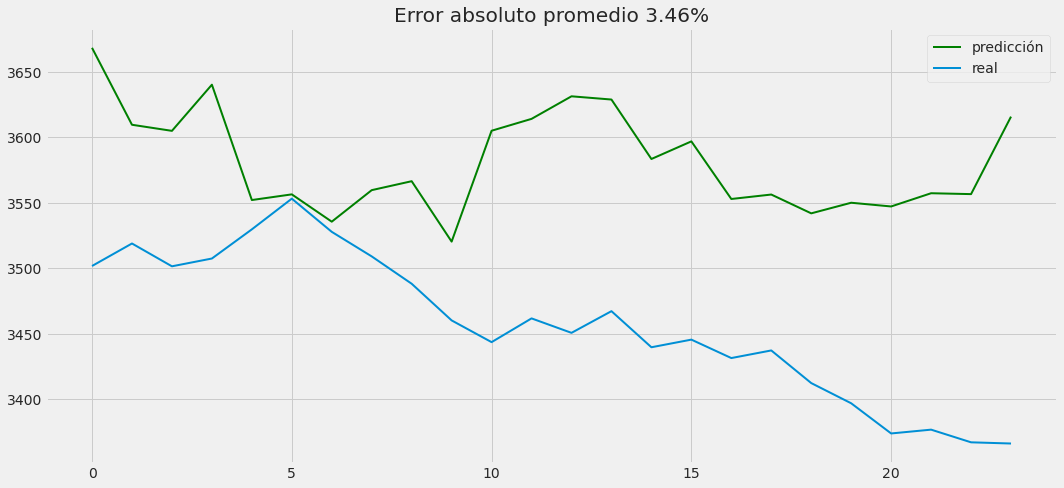

In [ ]:
plotModelResults(lr , plot_intervals = True )

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = AMZN.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

71

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.31026166, 0.39975919, 0.43552202, 0.40284298, 0.38059466,
       0.40514918, 0.41372735, 0.47988958, 0.45786144, 0.4449556 ,
       0.47600226, 0.50228026, 0.49007418, 0.46483255, 0.41957477,
       0.50396514, 0.49725281, 0.46745004, 0.45529584, 0.47593773,
       0.45190076, 0.51816676, 0.49860046, 0.53340474, 0.51920313,
       0.50795622, 0.4837769 , 0.47304818, 0.62580638, 0.72997373,
       0.79683573, 0.7855882 , 0.7934666 , 0.81588321, 0.8545495 ,
       0.95199124, 1.        , 0.98264943, 0.83231384, 0.89935869,
       0.82850434, 0.80466225, 0.63926963, 0.63022517, 0.53953372,
       0.60044833, 0.59311406, 0.61864103, 0.53516745, 0.5062473 ,
       0.50948483, 0.4819756 , 0.45700603, 0.49276949, 0.55395616,
       0.55520005, 0.53503775, 0.60627931, 0.58095986, 0.58501548])]
[0.5190088856607051]

[array([0.31026166, 0.39975919, 0.43552202, 0.40284298, 0.38059466,
       0.40514918, 0.41372735, 0.47988958, 0.45786144, 0.4449556 ,
       0.47600226, 0.50228026, 0.490

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(11, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

11/11 [==============================] - 3s 31ms/step - loss: 0.0855


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

73.73582356770834

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

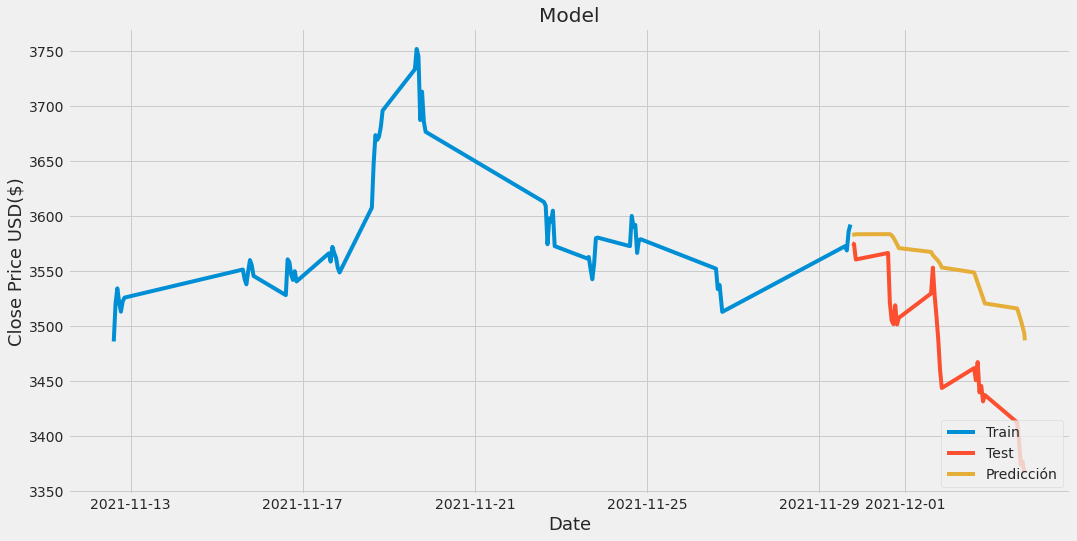

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
valid.head()

,Close,Predictions
2021-11-29 13:30:00-05:00,3575.429932,3583.046875
2021-11-29 14:30:00-05:00,3574.729980,3583.276367
2021-11-29 15:30:00-05:00,3560.679932,3583.618408
2021-11-30 09:30:00-05:00,3566.559326,3583.699951
2021-11-30 10:30:00-05:00,3521.540039,3583.738770


#### FB

In [ ]:
datos = pd.DataFrame()
close_prices = FB['Adj Close'].values
volume = FB.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = FB.High.values
datos['LOW'] = FB.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.5238


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.47619047619047616
0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3810


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.6875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6190476190476191
0.2
0.2857142857142857
0.23529411764705882


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ', np.mean(scores))

Promedio :  0.4625


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.375
0.3333333333333333
0.35294117647058826


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.4762


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.4875


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.5238095238095238
0.5
0.36363636363636365
0.4210526315789474


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

Exactitud en test = 0.3333


In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

Promedio :  0.5


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.6666666666666666
0.0
0.0
0.0


In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



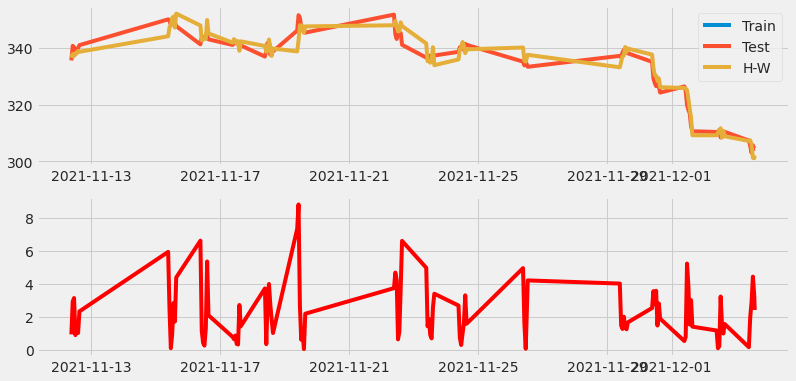

In [ ]:
pronostico_hw = plotHWSmothing(FB.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

0.5346534653465347

In [ ]:
datos_para_rl = pd.DataFrame(FB.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

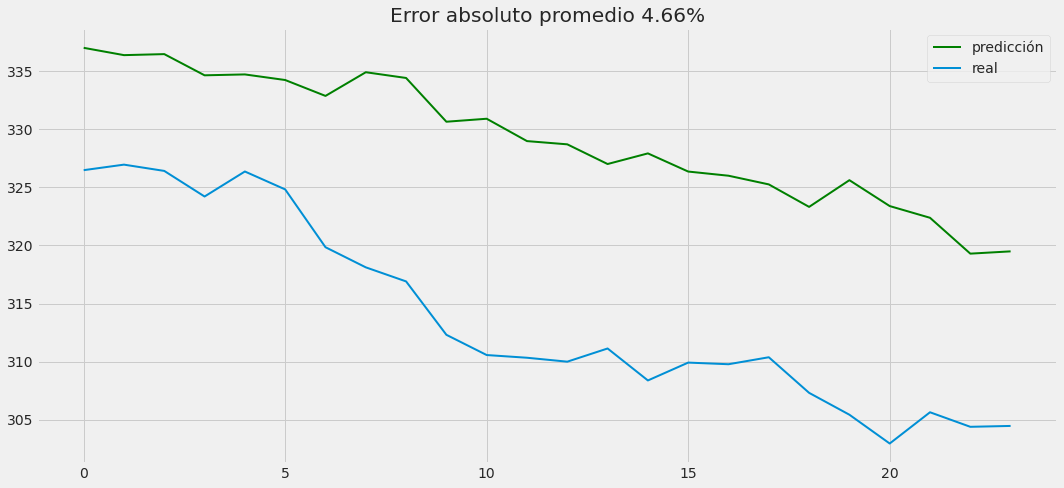

In [ ]:
plotModelResults(lr , plot_intervals = True )

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
data = FB.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

71

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.66849217, 0.77427067, 0.76482265, 0.73873704, 0.74325576,
       0.75835265, 0.77919996, 0.96562097, 0.95922932, 0.92349009,
       0.95577242, 0.92790664, 0.94187338, 0.91702009, 0.7848482 ,
       0.83784057, 0.82722793, 0.83260288, 0.8520129 , 0.85067778,
       0.82089519, 0.78074067, 0.8094959 , 0.79285892, 0.79686429,
       0.80174656, 0.79439964, 0.77735147, 0.69652844, 0.73771031,
       0.79658034, 0.73812088, 0.71049517, 0.7392504 , 0.73380775,
       0.88477349, 0.99589247, 0.97833094, 0.90911279, 0.89505517,
       0.87121732, 0.8697794 , 1.        , 0.85766115, 0.82377103,
       0.86567124, 0.85827731, 0.866493  , 0.7816646 , 0.68882611,
       0.69231811, 0.70423076, 0.67054562, 0.68923667, 0.71121413,
       0.70423076, 0.73113751, 0.76461706, 0.75290937, 0.7818702 ])]
[0.7437691257532775]

[array([0.66849217, 0.77427067, 0.76482265, 0.73873704, 0.74325576,
       0.75835265, 0.77919996, 0.96562097, 0.95922932, 0.92349009,
       0.95577242, 0.92790664, 0.941

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(11, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

11/11 [==============================] - 4s 33ms/step - loss: 0.1556


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15.887867228190105

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show>

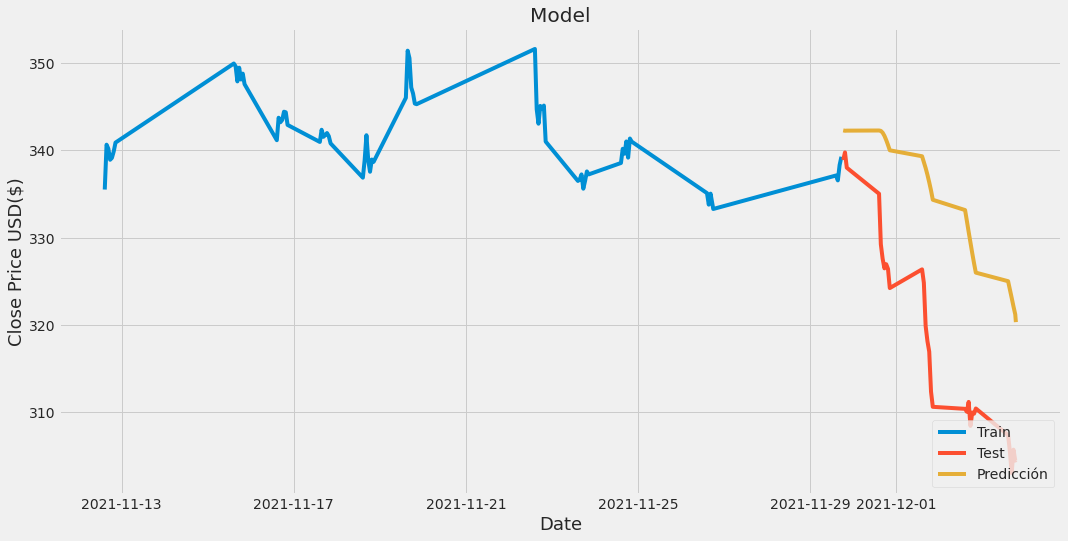

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
datos = pd.DataFrame()
close_prices = ['Adj Close'].values
volume = NFLX.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = NFLX.High.values
datos['LOW'] = NFLX.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

AttributeError: ignored

In [ ]:
datos = pd.DataFrame()
close_prices = NFLX['Adj Close'].values
volume = NFLX.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = NFLX.High.values
datos['LOW'] = NFLX.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ', np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
def plotHWSmothing(series, n = 20):
  hw = ExponentialSmoothing((series), seasonal_periods = 12,
                             trend = 'add', seasonal = 'add').fit()
  # Pronóstico 
  train , test = series[:-n], series[len(series)-n:]
  hw_p = hw.predict(start = test.index[0], end = test.index[ -1])
  fig, ax =  plt.subplots(nrows = 2, ncols = 1, figsize = (12, 6))
  ax[0].plot(train.index, train, label ='Train')
  ax[0].plot(test.index, test, label = 'Test')
  ax[0].plot(hw_p.index, hw_p, label = 'H-W')
  ax[0].legend(loc = 'best')

  ax[1].plot(test.index, np.abs(hw_p - test), c = 'red')
  return hw_p, test

In [ ]:
pronostico_hw = plotHWSmothing(NFLX.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

In [ ]:
datos_para_rl = pd.DataFrame(NFLX.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

In [ ]:
plotModelResults(lr , plot_intervals = True )

In [ ]:
data = NFLX.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

In [ ]:
datos = pd.DataFrame()
close_prices = TSLA['Adj Close'].values
volume = TSLA.Volume.values
datos['UPSDOWNS'] = upsdowns(close_prices)
datos['CLOSE'] = close_prices
datos['HIGH'] = TSLA.High.values
datos['LOW'] = TSLA.Low.values
datos['VOLUME'] = volume
datos['S&P500'] = SP500['Adj Close'].values
datos['MA-5'] = MA(5, close_prices)
datos['OBV'] = OBV(volume)
datos['PSY-12'] = PSY(12, close_prices)
datos['BIAS-6'] = BIAS(6, close_prices)
datos['DISPARITY-5'] = disparity(5, close_prices)
datos['MOMENTUM'] = momentum(close_prices)

In [ ]:
x, y = datos.iloc[:, 1:].values, datos.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 2),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 2, kernel = 'rbf'),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components = 6),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ', np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        KernelPCA(n_components = 8, kernel = 'rbf'),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
pipe_lr = make_pipeline(StandardScaler(),
                        DecisionTreeClassifier())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Exactitud en test = %.4f' % pipe_lr.score(X_test, y_test))

In [ ]:
kfold = StratifiedKFold(n_splits=10).split(X_train,y_train)
scores = []
for k,(train,test) in enumerate(kfold):
  pipe_lr.fit(X_train[train],y_train[train])
  score = pipe_lr.score(X_train[test],y_train[test])
  scores.append(score)

print('Promedio : ',np.mean(scores))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print(mean_squared_error(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred))
print(metrics.recall_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))


In [ ]:
pronostico_hw = plotHWSmothing(TSLA.Close, n = 600)

In [ ]:
def precisión_HW(predicted, test):
  upsdowns_predicted = upsdowns(predicted)
  upsdowns_test = upsdowns(test)
  predicciones_buenas = 0
  for i in range(len(upsdowns_predicted)):
    if upsdowns_predicted[i] == upsdowns_test[i]:
      predicciones_buenas += 1
  return predicciones_buenas/len(upsdowns_predicted)

In [ ]:
precisión_HW(pronostico_hw[0], pronostico_hw[1])

In [ ]:
datos_para_rl = pd.DataFrame(TSLA.Close.copy())
datos_para_rl.columns = ["y"]
tscv = TimeSeriesSplit(n_splits = 5)

In [ ]:
for i in range (6 , 25):
  datos_para_rl["lag_{}".format(i)] = datos_para_rl.y.shift(i)

In [ ]:
def timeseries_train_test_split(X, y, test_size):
  test_index = int(len(X)*(1 - test_size))
  X_train = X.iloc[:test_index]
  y_train = y.iloc[:test_index]
  X_test = X.iloc[test_index:]
  y_test = y.iloc[test_index:]
  return X_train, X_test, y_train, y_test

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [ ]:
y = datos_para_rl.dropna().y
X = datos_para_rl.dropna().drop(['y'], axis = 1)
# 30 % de los datos para prueba
X_train , X_test , y_train , y_test = timeseries_train_test_split(X, y, test_size =0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

In [ ]:
def plotModelResults(model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test, plot_intervals = False, plot_anomalies = False):
  """ Gráfica del modelo vs valores reales con intervalo de predicción """
  prediction = model.predict(X_test)
  plt.figure(figsize = (15 , 7))
  plt.plot(prediction, "g", label = "predicción", linewidth = 2.0)
  plt.plot(y_test.values, label = "real", linewidth = 2.0)
  # intervalos & anomalías
  if plot_intervals:
  # Aquí usamos cross_val_score
    cv = cross_val_score(model, X_train, y_train, cv = tscv, scoring = "neg_mean_absolute_error")
  # ...
  error = mean_absolute_percentage_error(prediction, y_test)
  plt.title("Error absoluto promedio {0:.2f}%".format(error))
  plt.legend(loc = "best")
  plt.tight_layout()

In [ ]:
plotModelResults(lr , plot_intervals = True )

In [ ]:
data = TSLA.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.7)
training_data_len

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predicción'], loc = 'lower right')
plt.show

<a name='13'> </a> 
### Descripcion de las tecnicas y metricas de evaluacion del modelo

Dentro de las métricas de evaluación usadas, el mejor indicador es el puntaje de precisión, el cuál nos indica de forma porcentual como qué tanto se acercan los resultados de las predicciones en comparación a un conjunto de pruebas. Por otra parte también se hace uso del error cuadrático medio que mide el promdio de las diferencias entre las predicciones y los datos reales.

Por otra parte, las métricas de Recall y F1 score nos dan una mejor idea del comportamiento de los datos catalogados como verdaderos positivos (TP), verdaderos negativos (TN), falsos positivos (FP) o falsos negativos (FN),

La métrica de exhaustividad (Recall) nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. Dada por la siguiente ecuación:

\begin{equation}
    \text{Recall} = \frac{TP}{TP + FN}
\end{equation}

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor. Esto es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

\begin{equation}
    \text{F1} = 2 \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}
